In [1]:
#load data
import pandas as pd

data=pd.read_csv("train.csv")

In [2]:
data.shape

(42000, 785)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
y=data.pop("label")
y=to_categorical(y)
x_train, x_val, y_train, y_val=train_test_split(data,y,test_size=0.2)
'''
x_train=np.array(x_train/256,dtype=np.float32)
x_val=np.array(x_val/256,dtype=np.float32)
'''

In [4]:
#preprocessing
'''
import numpy as np
x_noise=10*np.random.normal(size=(x_train.shape))
#y_noise=0.05*np.random.normal(size=(y_train.shape))
print(x_noise)
x_train=np.vstack((x_train,x_train+x_noise))
y_train=np.vstack((y_train,y_train))
'''

'\nimport numpy as np\nx_noise=10*np.random.normal(size=(x_train.shape))\n#y_noise=0.05*np.random.normal(size=(y_train.shape))\nprint(x_noise)\nx_train=np.vstack((x_train,x_train+x_noise))\ny_train=np.vstack((y_train,y_train))\n'

In [5]:
print(x_train.shape)
print(x_val.shape)

(33600, 784)
(8400, 784)


In [8]:
print(y_train.shape)

(33600, 10)


In [9]:
#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import layers

import numpy as np

NN_model=keras.models.Sequential()
NN_model.add(Dense(32))
NN_model.add(Activation("relu"))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(32))
NN_model.add(Activation("relu"))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(10))
NN_model.add(Activation("softmax"))

NN_model.compile(loss="categorical_crossentropy", optimizer="rmsprop",metrics=[keras.metrics.CategoricalAccuracy()],)

In [16]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                3

In [14]:
History=NN_model.fit(x_train, y_train, batch_size=128,epochs=60,validation_data=(x_val, y_val))

Epoch 1/60
263/263 [==============================] - 1s 2ms/step - loss: 1.1373 - categorical_accuracy: 0.6209 - val_loss: 0.8312 - val_categorical_accuracy: 0.7782
Epoch 2/60
263/263 [==============================] - 0s 2ms/step - loss: 1.1345 - categorical_accuracy: 0.6187 - val_loss: 0.8158 - val_categorical_accuracy: 0.7823
Epoch 3/60
263/263 [==============================] - 1s 2ms/step - loss: 1.1207 - categorical_accuracy: 0.6266 - val_loss: 0.9320 - val_categorical_accuracy: 0.7777
Epoch 4/60
263/263 [==============================] - 1s 2ms/step - loss: 1.1229 - categorical_accuracy: 0.6249 - val_loss: 0.8971 - val_categorical_accuracy: 0.7635
Epoch 5/60
263/263 [==============================] - 0s 2ms/step - loss: 1.1291 - categorical_accuracy: 0.6235 - val_loss: 0.8333 - val_categorical_accuracy: 0.7687
Epoch 6/60
263/263 [==============================] - 0s 2ms/step - loss: 1.1229 - categorical_accuracy: 0.6237 - val_loss: 0.8571 - val_categorical_accuracy: 0.7881
Epoc

In [11]:
test=pd.read_csv("test.csv")
result=NN_model.predict(test)
output=[]
imid=[]
for i in range(len(result)):
    output.append(np.argmax(result[i]))
    imid.append(i+1)
print(output)
submission={"ImageId":imid,"Label":output}
submission=pd.DataFrame(submission)
submission.to_csv("sample_submission copy.csv", index=False)

875/875 [==============================] - 1s 665us/step
[2, 0, 9, 9, 2, 7, 0, 3, 0, 5, 5, 7, 9, 0, 9, 5, 5, 1, 9, 0, 9, 1, 8, 5, 7, 4, 2, 9, 0, 7, 7, 5, 4, 2, 6, 2, 8, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 8, 6, 8, 8, 3, 0, 2, 1, 8, 2, 0, 9, 1, 7, 0, 0, 0, 1, 4, 0, 1, 6, 5, 8, 8, 2, 0, 5, 9, 2, 2, 5, 9, 1, 0, 4, 2, 4, 3, 6, 7, 2, 0, 6, 6, 8, 4, 3, 9, 8, 9, 0, 9, 2, 0, 9, 7, 0, 5, 0, 8, 9, 0, 4, 7, 1, 3, 1, 1, 5, 3, 3, 7, 2, 8, 6, 5, 8, 7, 8, 4, 5, 5, 6, 0, 0, 0, 5, 1, 3, 4, 4, 3, 4, 5, 8, 8, 0, 9, 2, 8, 4, 3, 5, 6, 5, 8, 7, 9, 7, 8, 3, 0, 9, 5, 1, 8, 7, 6, 5, 0, 2, 7, 0, 6, 1, 3, 7, 4, 1, 2, 4, 2, 5, 6, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 4, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4, 2, 3, 1, 8, 2, 8, 4, 6, 1, 0, 0, 4, 9, 1, 7, 8, 2, 2, 8, 6, 8, 6, 2, 8, 5, 5, 4, 5, 3, 0, 9, 0, 1, 9, 8, 9, 5, 1, 4, 3, 6, 5, 3, 5, 7, 0, 6, 8, 8, 1, 6, 0, 6, 3, 8, 9, 1, 5, 8, 4, 0, 0, 2, 9, 5, 5, 7, 8, 4, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 8, 2, 0, 1, 4, 5, 8, 8, 9, 0, 

In [12]:
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      2
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


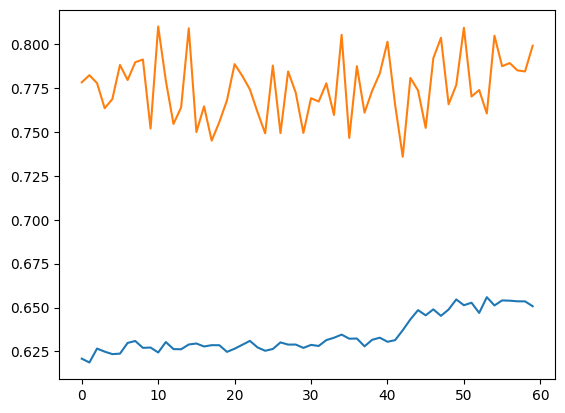

In [15]:
#visualizing
print(History.history.keys())
import matplotlib.pyplot as plt
plt.plot(History.history["categorical_accuracy"])
plt.plot(History.history["val_categorical_accuracy"])
